<a href="https://colab.research.google.com/github/anshupandey/Machine_Learning_Training/blob/master/Apache_Spark_Working_with_dataframes_and_Spark_SQL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=#FF6378> <b> Module : Big Data Analysis </font>


## <b> Section: Working with PySpark </b>
***
***

## Lab-1: Big Data Computation - working with PySpark

## Objectives
***
* Introduction to PySpark
* Installing and setting up PySpark
* PySpark Architecture
* Difference between Pandas and PySpark dataframes

### Introduction to PySpark
***

PySpark is a Spark library written in Python to run Python application using Apache Spark capabilities, using PySpark we can run applications parallelly on the distributed cluster (multiple nodes).

In other words, PySpark is a Python API for Apache Spark. Apache Spark is an analytical processing engine for large scale powerful distributed data processing and machine learning applications. 

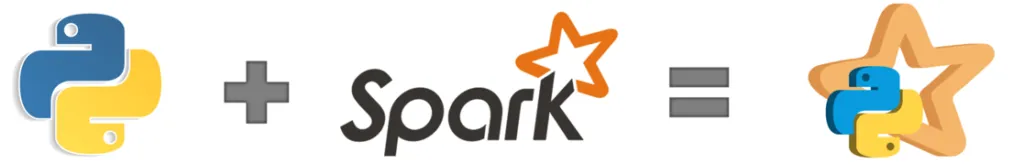

Spark basically written in Scala and later on due to its industry adaptation it’s API PySpark released for Python using Py4J. 

Py4J is a Java library that is integrated within PySpark and allows python to dynamically interface with JVM objects, hence to run PySpark you also need Java to be installed along with Python, and Apache Spark.

### Installing and setting up PySpark
***

Download the jdk and spark package from the apache's website.

In [1]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [6]:
!wget -q https://dlcdn.apache.org/spark/spark-3.2.2/spark-3.2.2-bin-hadoop3.2.tgz

In [8]:
!tar xzf spark-3.2.2-bin-hadoop3.2.tgz

In [ ]:
!pip install -q findspark
# !pip install -q pyspark

In [1]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.2-bin-hadoop3.2"

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()


In [3]:
spark

### PySpark Architecture
***
Apache Spark works in a master-slave architecture where the master is called “Driver” and slaves are called “Workers”. When you run a Spark application, Spark Driver creates a context that is an entry point to your application, and all operations (transformations and actions) are executed on worker nodes, and the resources are managed by Cluster Manager.

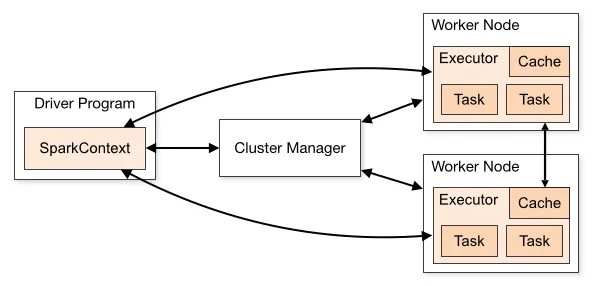

###Difference between Pandas and PySpark dataframes
***

Pandas is one of the most used open-source Python libraries to work with Structured tabular data for analysis. Pandas library is heavily used for Data Analytics, Machine learning, data science projects, and many more.

Pandas can load the data by reading CSV, JSON, SQL, many other formats and creates a DataFrame which is a structured object containing rows and columns (similar to SQL table).

It doesn’t support distributed processing hence you would always need to increase the resources when you need additional horsepower to support your growing data.

Let us create a simple dataframe in pandas by first importing it. 

In [4]:
import pandas as pd

data = [["James","","Smith",30,"M",60000], 
        ["Michael","Rose","",50,"M",70000], 
        ["Robert","","Williams",42,"",400000], 
        ["Maria","Anne","Jones",38,"F",500000], 
        ["Jen","Mary","Brown",45,None,0]] 
columns=['First Name','Middle Name','Last Name','Age','Gender','Salary']

# Create the pandas DataFrame 
pandasDF=pd.DataFrame(data=data, columns=columns) 
  
# print dataframe. 
print(pandasDF)

  First Name Middle Name Last Name  Age Gender  Salary
0      James                 Smith   30      M   60000
1    Michael        Rose             50      M   70000
2     Robert              Williams   42         400000
3      Maria        Anne     Jones   38      F  500000
4        Jen        Mary     Brown   45   None       0


Now we perform some statistical functions on this dataframe.

* df.count() – Returns the count of each column (the count includes only non-null values)
* df.corr() – Returns the correlation between columns in a data frame
* df.head(n) – Returns first n rows from the top
* df.max() – Returns the maximum of each column
* df.mean() – Returns the mean of each column
* df.median() – Returns the median of each column
* df.min() – Returns the minimum value in each column
* df.std() – Returns the standard deviation of each column
* df.tail(n) – Returns last n rows

In [5]:
print(pandasDF.count())

First Name     5
Middle Name    5
Last Name      5
Age            5
Gender         4
Salary         5
dtype: int64


In [6]:
print(pandasDF.corr())

             Age    Salary
Age     1.000000 -0.164756
Salary -0.164756  1.000000


In [7]:
print(pandasDF.mean())

Age           41.0
Salary    206000.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [8]:
print(pandasDF.median())

Age          42.0
Salary    70000.0
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [9]:
print(pandasDF.min())

First Name     James
Middle Name         
Last Name           
Age               30
Salary             0
dtype: object


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [10]:
print(pandasDF.std())

Age            7.549834
Salary    227112.307020
dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [11]:
print(pandasDF.head(2))

  First Name Middle Name Last Name  Age Gender  Salary
0      James                 Smith   30      M   60000
1    Michael        Rose             50      M   70000


Now let us work with PySpark. In very simple words Pandas run operations on a single machine whereas PySpark runs on multiple machines. 

If you are working on a Machine Learning application where you are dealing with larger datasets, PySpark is a best fit which could processes operations many times(100x) faster than Pandas.

Let us first make a SparkSession. SparkSession was introduced in version 2.0. It is an entry point to underlying PySpark functionality in order to programmatically create PySpark RDD, DataFrame. It’s object spark is default available in pyspark-shell and it can be created programmatically using SparkSession. 

* appName() – Used to set your application name.
* getOrCreate() – This returns a SparkSession object if already exists, creates new one if not exists.

In [12]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('PySpark Tutorial').getOrCreate()

In [13]:
data = [("James","","Smith",30,"M",60000),
        ("Michael","Rose","",50,"M",70000),
        ("Robert","","Williams",42,"",400000),
        ("Maria","Anne","Jones",38,"F",500000),
        ("Jen","Mary","Brown",45,"F",0)]

columns = ["first_name","middle_name","last_name","Age","gender","salary"]

#Creates a dataframe
pysparkDF = spark.createDataFrame(data = data, schema = columns)
#prints the schema
pysparkDF.printSchema()
pysparkDF.show(truncate=False)

root
 |-- first_name: string (nullable = true)
 |-- middle_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- Age: long (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+----------+-----------+---------+---+------+------+
|first_name|middle_name|last_name|Age|gender|salary|
+----------+-----------+---------+---+------+------+
|James     |           |Smith    |30 |M     |60000 |
|Michael   |Rose       |         |50 |M     |70000 |
|Robert    |           |Williams |42 |      |400000|
|Maria     |Anne       |Jones    |38 |F     |500000|
|Jen       |Mary       |Brown    |45 |F     |0     |
+----------+-----------+---------+---+------+------+



We can calculate the mean, max, etc functions by importing them as follows. 

We are calculating the mean of age and salary col and simply displaying them.

In Example-2, we are agreggating the mean of age, mean of salary and max or salary by grouping them by gender. 

In [14]:
from pyspark.sql.functions import mean, col, max

#Example-1 
df2 = pysparkDF.select(mean("age"),mean("salary")).show()

#Example-2
pysparkDF.groupBy("gender").agg(mean("age"),mean("salary"),max("salary")).show()

+--------+-----------+
|avg(age)|avg(salary)|
+--------+-----------+
|    41.0|   206000.0|
+--------+-----------+

+------+--------+-----------+-----------+
|gender|avg(age)|avg(salary)|max(salary)|
+------+--------+-----------+-----------+
|     M|    40.0|    65000.0|      70000|
|     F|    41.5|   250000.0|     500000|
|      |    42.0|   400000.0|     400000|
+------+--------+-----------+-----------+



Instead of following the above approach, we can implement a simpler approach by writing the SQL queries directly.

We are creating a TempView and naming it "Employee", so we can now refer to this pysparkDF dataframe as "Employee" table and perform SQL queries on it. 

In [15]:
pysparkDF.createOrReplaceTempView("Employee")
spark.sql("select * from Employee where salary > 100000").show()

+----------+-----------+---------+---+------+------+
|first_name|middle_name|last_name|Age|gender|salary|
+----------+-----------+---------+---+------+------+
|    Robert|           | Williams| 42|      |400000|
|     Maria|       Anne|    Jones| 38|     F|500000|
+----------+-----------+---------+---+------+------+



In [16]:
spark.sql("select mean(age),mean(salary) from Employee").show()

+---------+------------+
|mean(age)|mean(salary)|
+---------+------------+
|     41.0|    206000.0|
+---------+------------+



## Thank You

## Lab-2: Big Data Computation Working with PySpark

## Objectives
***
* Inspect Data
* Selecting and Aggregating Data
* Grouping and Aggregating


Here we are using a simple dataset that includes FIFA-2018 football player's data.

In [17]:
!wget -q https://gitlab.com/bluedatac/ai-ml-datasets/-/raw/main/Lab_Exercises/Module14/wc2018-players.csv

In [18]:
# Now, we can import SparkSession from pyspark.sql and create a SparkSession, 
# which is the entry point to Spark.
# You can give a name to the session using appName() and add some configurations 
# with config() if you wish.

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('player2018').getOrCreate()

In [21]:
from pyspark.sql.types import *
sschema = StructType(
                    [ StructField("Team", StringType(), True),
                      StructField("#", IntegerType(), True),
                      StructField("Pos", StringType(), True),
                      StructField("FIFA Popular Name", StringType(), True),
                      StructField("Birth Date", DateType(), True),
                      StructField("Shirt Name", StringType(), True),
                      StructField("Club", StringType(), True),
                      StructField("Height", IntegerType(), True),
                      StructField("Weight", IntegerType(), True)
                    ]
                    )

# Loading the dataset
wc = spark.read.csv('wc2018-players.csv',header=True, schema = sschema)
wc.printSchema()

root
 |-- Team: string (nullable = true)
 |-- #: integer (nullable = true)
 |-- Pos: string (nullable = true)
 |-- FIFA Popular Name: string (nullable = true)
 |-- Birth Date: date (nullable = true)
 |-- Shirt Name: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)



###Inspect Data
***

* wc.dtypes - Return wc column names and data types
* wc.show() - Display the content of wc
* wc.head() - Return first n rows
* wc.first() - Return first row
* wc.take(2) - Return the first n rows
* wc.schema - Return the schema of wc
* wc.columns - Returns columns

In [ ]:
wc.dtypes

[('Team', 'string'),
 ('#', 'int'),
 ('Pos', 'string'),
 ('FIFA Popular Name', 'string'),
 ('Birth Date', 'date'),
 ('Shirt Name', 'string'),
 ('Club', 'string'),
 ('Height', 'int'),
 ('Weight', 'int')]

In [23]:
# Viewing the dataset
wc.show(5)

+---------+---+---+------------------+----------+----------+--------------------+------+------+
|     Team|  #|Pos| FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+---------+---+---+------------------+----------+----------+--------------------+------+------+
|Argentina|  3| DF|TAGLIAFICO Nicolas|      null|TAGLIAFICO|      AFC Ajax (NED)|   169|    65|
|Argentina| 22| MF|    PAVON Cristian|      null|     PAVÓN|CA Boca Juniors (...|   169|    65|
|Argentina| 15| MF|    LANZINI Manuel|      null|   LANZINI|West Ham United F...|   167|    66|
|Argentina| 18| DF|    SALVIO Eduardo|      null|    SALVIO|    SL Benfica (POR)|   167|    69|
|Argentina| 10| FW|      MESSI Lionel|      null|     MESSI|  FC Barcelona (ESP)|   170|    72|
+---------+---+---+------------------+----------+----------+--------------------+------+------+
only showing top 5 rows



In [24]:
wc.head()

Row(Team='Argentina', #=3, Pos='DF', FIFA Popular Name='TAGLIAFICO Nicolas', Birth Date=None, Shirt Name='TAGLIAFICO', Club='AFC Ajax (NED)', Height=169, Weight=65)

In [25]:
wc.first()

Row(Team='Argentina', #=3, Pos='DF', FIFA Popular Name='TAGLIAFICO Nicolas', Birth Date=None, Shirt Name='TAGLIAFICO', Club='AFC Ajax (NED)', Height=169, Weight=65)

In [ ]:
wc.take(2)

[Row(Team='Argentina', #=3, Pos='DF', FIFA Popular Name='TAGLIAFICO Nicolas', Birth Date=None, Shirt Name='TAGLIAFICO', Club='AFC Ajax (NED)', Height=169, Weight=65),
 Row(Team='Argentina', #=22, Pos='MF', FIFA Popular Name='PAVON Cristian', Birth Date=None, Shirt Name='PAVÓN', Club='CA Boca Juniors (ARG)', Height=169, Weight=65)]

In [26]:
# columns

wc.columns

['Team',
 '#',
 'Pos',
 'FIFA Popular Name',
 'Birth Date',
 'Shirt Name',
 'Club',
 'Height',
 'Weight']

In [29]:
type(wc.columns), type(wc.columns[0])

(list, str)

In [ ]:
wc.schema

StructType(List(StructField(Team,StringType,true),StructField(#,IntegerType,true),StructField(Pos,StringType,true),StructField(FIFA Popular Name,StringType,true),StructField(Birth Date,DateType,true),StructField(Shirt Name,StringType,true),StructField(Club,StringType,true),StructField(Height,IntegerType,true),StructField(Weight,IntegerType,true)))

In [ ]:
# Print Schema
wc.printSchema()

root
 |-- Team: string (nullable = true)
 |-- #: integer (nullable = true)
 |-- Pos: string (nullable = true)
 |-- FIFA Popular Name: string (nullable = true)
 |-- Birth Date: date (nullable = true)
 |-- Shirt Name: string (nullable = true)
 |-- Club: string (nullable = true)
 |-- Height: integer (nullable = true)
 |-- Weight: integer (nullable = true)



In [27]:
# Shape of data
print("Shape: ", (wc.count(), len(wc.columns)))

Shape:  (736, 9)


In [ ]:
wc.dropDuplicates()

DataFrame[Team: string, #: int, Pos: string, FIFA Popular Name: string, Birth Date: date, Shirt Name: string, Club: string, Height: int, Weight: int]

### Selecting and Aggregating 
***

The first clause in any query is the SELECT clause. The SELECT clause contains either a list of the columns you want returned from the query separated by a comma, or the wildcard *. The second clause in the query is the FROM clause. The FROM clause indicates against which table to run the query.

The wildcard * when used after SELECT means that all the columns in the table should be returned and they are presented in the order in which they are found in the original table.

We can select a column by using the select() query.

In [30]:
wc.select("FIFA Popular Name").show()

+------------------+
| FIFA Popular Name|
+------------------+
|TAGLIAFICO Nicolas|
|    PAVON Cristian|
|    LANZINI Manuel|
|    SALVIO Eduardo|
|      MESSI Lionel|
|  ANSALDI Cristian|
|      BIGLIA Lucas|
|       BANEGA Ever|
| MASCHERANO Javier|
|      DYBALA Paulo|
|     AGUERO Sergio|
|   HIGUAIN Gonzalo|
|    DI MARIA Angel|
|  LO CELSO Giovani|
|  MEZA Maximiliano|
|      ACUNA Marcos|
|CABALLERO Wilfredo|
|   MERCADO Gabriel|
|  OTAMENDI Nicolas|
|       ROJO Marcos|
+------------------+
only showing top 20 rows



In [31]:
wc.select("FIFA Popular Name","Club").show()

+------------------+--------------------+
| FIFA Popular Name|                Club|
+------------------+--------------------+
|TAGLIAFICO Nicolas|      AFC Ajax (NED)|
|    PAVON Cristian|CA Boca Juniors (...|
|    LANZINI Manuel|West Ham United F...|
|    SALVIO Eduardo|    SL Benfica (POR)|
|      MESSI Lionel|  FC Barcelona (ESP)|
|  ANSALDI Cristian|     Torino FC (ITA)|
|      BIGLIA Lucas|      AC Milan (ITA)|
|       BANEGA Ever|    Sevilla FC (ESP)|
| MASCHERANO Javier|Hebei China Fortu...|
|      DYBALA Paulo|   Juventus FC (ITA)|
|     AGUERO Sergio|Manchester City F...|
|   HIGUAIN Gonzalo|   Juventus FC (ITA)|
|    DI MARIA Angel|Paris Saint-Germa...|
|  LO CELSO Giovani|Paris Saint-Germa...|
|  MEZA Maximiliano|CA Independiente ...|
|      ACUNA Marcos|   Sporting CP (POR)|
|CABALLERO Wilfredo|    Chelsea FC (ENG)|
|   MERCADO Gabriel|    Sevilla FC (ESP)|
|  OTAMENDI Nicolas|Manchester City F...|
|       ROJO Marcos|Manchester United...|
+------------------+--------------

Shows the names and height by adding 1 to the height column.

In [32]:
wc.select(wc["FIFA Popular Name"], wc["Height"]+1).show()

+------------------+------------+
| FIFA Popular Name|(Height + 1)|
+------------------+------------+
|TAGLIAFICO Nicolas|         170|
|    PAVON Cristian|         170|
|    LANZINI Manuel|         168|
|    SALVIO Eduardo|         168|
|      MESSI Lionel|         171|
|  ANSALDI Cristian|         182|
|      BIGLIA Lucas|         176|
|       BANEGA Ever|         176|
| MASCHERANO Javier|         175|
|      DYBALA Paulo|         178|
|     AGUERO Sergio|         173|
|   HIGUAIN Gonzalo|         185|
|    DI MARIA Angel|         179|
|  LO CELSO Giovani|         178|
|  MEZA Maximiliano|         181|
|      ACUNA Marcos|         173|
|CABALLERO Wilfredo|         187|
|   MERCADO Gabriel|         182|
|  OTAMENDI Nicolas|         182|
|       ROJO Marcos|         190|
+------------------+------------+
only showing top 20 rows



The below snippet shows the player name and simultaneously checks whether or not they have height > 170

In [33]:
wc.select(wc["FIFA Popular Name"], wc["Height"] > 170).show()

+------------------+--------------+
| FIFA Popular Name|(Height > 170)|
+------------------+--------------+
|TAGLIAFICO Nicolas|         false|
|    PAVON Cristian|         false|
|    LANZINI Manuel|         false|
|    SALVIO Eduardo|         false|
|      MESSI Lionel|         false|
|  ANSALDI Cristian|          true|
|      BIGLIA Lucas|          true|
|       BANEGA Ever|          true|
| MASCHERANO Javier|          true|
|      DYBALA Paulo|          true|
|     AGUERO Sergio|          true|
|   HIGUAIN Gonzalo|          true|
|    DI MARIA Angel|          true|
|  LO CELSO Giovani|          true|
|  MEZA Maximiliano|          true|
|      ACUNA Marcos|          true|
|CABALLERO Wilfredo|          true|
|   MERCADO Gabriel|          true|
|  OTAMENDI Nicolas|          true|
|       ROJO Marcos|          true|
+------------------+--------------+
only showing top 20 rows



Show FIFA Popular Name and 0 or 1 depending on Height>170

In [34]:
from pyspark.sql import functions as F
wc.select("FIFA Popular Name", F.when(wc["Height"] > 170, 1).otherwise(0)).show()

+------------------+------------------------------------------+
| FIFA Popular Name|CASE WHEN (Height > 170) THEN 1 ELSE 0 END|
+------------------+------------------------------------------+
|TAGLIAFICO Nicolas|                                         0|
|    PAVON Cristian|                                         0|
|    LANZINI Manuel|                                         0|
|    SALVIO Eduardo|                                         0|
|      MESSI Lionel|                                         0|
|  ANSALDI Cristian|                                         1|
|      BIGLIA Lucas|                                         1|
|       BANEGA Ever|                                         1|
| MASCHERANO Javier|                                         1|
|      DYBALA Paulo|                                         1|
|     AGUERO Sergio|                                         1|
|   HIGUAIN Gonzalo|                                         1|
|    DI MARIA Angel|                    

In [ ]:
wc.withColumn('Team',wc["Team"]).withColumn('Pos', wc["Pos"]).show()

+---------+---+---+------------------+----------+----------+--------------------+------+------+
|     Team|  #|Pos| FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+---------+---+---+------------------+----------+----------+--------------------+------+------+
|Argentina|  3| DF|TAGLIAFICO Nicolas|      null|TAGLIAFICO|      AFC Ajax (NED)|   169|    65|
|Argentina| 22| MF|    PAVON Cristian|      null|     PAVÓN|CA Boca Juniors (...|   169|    65|
|Argentina| 15| MF|    LANZINI Manuel|      null|   LANZINI|West Ham United F...|   167|    66|
|Argentina| 18| DF|    SALVIO Eduardo|      null|    SALVIO|    SL Benfica (POR)|   167|    69|
|Argentina| 10| FW|      MESSI Lionel|      null|     MESSI|  FC Barcelona (ESP)|   170|    72|
|Argentina|  4| DF|  ANSALDI Cristian|      null|   ANSALDI|     Torino FC (ITA)|   181|    73|
|Argentina|  5| MF|      BIGLIA Lucas|      null|    BIGLIA|      AC Milan (ITA)|   175|    73|
|Argentina|  7| MF|       BANEGA Ever|  

Filter entries of weight, only keep those records of which the values are > 75

In [ ]:
wc.filter(wc["weight"]>75).show()

+---------+---+---+------------------+----------+----------+--------------------+------+------+
|     Team|  #|Pos| FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+---------+---+---+------------------+----------+----------+--------------------+------+------+
|Argentina| 13| MF|  MEZA Maximiliano|      null|      MEZA|CA Independiente ...|   180|    76|
|Argentina|  8| DF|      ACUNA Marcos|      null|     ACUÑA|   Sporting CP (POR)|   172|    77|
|Argentina| 23| GK|CABALLERO Wilfredo|      null| CABALLERO|    Chelsea FC (ENG)|   186|    80|
|Argentina|  2| DF|   MERCADO Gabriel|      null|   MERCADO|    Sevilla FC (ESP)|   181|    81|
|Argentina| 17| DF|  OTAMENDI Nicolas|      null|  OTAMENDI|Manchester City F...|   181|    81|
|Argentina| 16| DF|       ROJO Marcos|      null|      ROJO|Manchester United...|   189|    82|
|Argentina|  6| DF|    FAZIO Federico|      null|     FAZIO|       AS Roma (ITA)|   199|    85|
|Argentina| 12| GK|     ARMANI Franco|  

### Aggregation

An aggregation is the result returned from running an aggregate function in a query and is displayed in a new column in the results table. An aggregate function is a function that results of a set of the data queried being condensed into an aggregation.

In [36]:
wc.createOrReplaceTempView("wc_view")

This shows the total sum of all the values in Height column. It doesn't make any sense to get the total value of the heights of players but just for the sake of understanding we take this column. It is more logical to find the average of the heights. 

In [37]:
spark.sql("SELECT SUM(Height) FROM wc_view").show()

+-----------+
|sum(Height)|
+-----------+
|     134252|
+-----------+



In [38]:
spark.sql("SELECT AVG(Height) FROM wc_view").show()

+-----------------+
|      avg(Height)|
+-----------------+
|182.4076086956522|
+-----------------+



This shows the total number of rows in wc_view.

In [39]:
spark.sql("SELECT COUNT(*) FROM wc_view").show()

+--------+
|count(1)|
+--------+
|     736|
+--------+



The below code gives the total number of players in team Argentina. 

In [40]:
spark.sql("SELECT COUNT(*) FROM wc_view WHERE Team='Argentina'").show()

+--------+
|count(1)|
+--------+
|      23|
+--------+



This shows the average height of the players in Argentina team.

In [41]:
spark.sql("SELECT AVG(Height) FROM wc_view WHERE Team='Argentina'").show()

+------------------+
|       avg(Height)|
+------------------+
|178.43478260869566|
+------------------+



Let us find the player who is tallest of all. First we find the value of maximum height and then get the details of that player

In [42]:
spark.sql("SELECT MAX(Height) from wc_view").show()

+-----------+
|max(Height)|
+-----------+
|        201|
+-----------+



In [43]:
spark.sql("SELECT * FROM wc_view where Height=201").show()

+-------+---+---+-----------------+----------+----------+--------------+------+------+
|   Team|  #|Pos|FIFA Popular Name|Birth Date|Shirt Name|          Club|Height|Weight|
+-------+---+---+-----------------+----------+----------+--------------+------+------+
|Croatia| 12| GK|    KALINIC Lovre|      null|L. KALINIĆ|KAA Gent (BEL)|   201|    96|
+-------+---+---+-----------------+----------+----------+--------------+------+------+



We can do the same for finding the shortest player by using the MIN() function

In [44]:
spark.sql("SELECT MIN(Height) from wc_view").show()

+-----------+
|min(Height)|
+-----------+
|        165|
+-----------+



In [45]:
spark.sql("SELECT * FROM wc_view where Height=165").show()

+------------+---+---+-----------------+----------+----------+--------------------+------+------+
|        Team|  #|Pos|FIFA Popular Name|Birth Date|Shirt Name|                Club|Height|Weight|
+------------+---+---+-----------------+----------+----------+--------------------+------+------+
|      Panama| 19| MF| QUINTERO Alberto|      null|  QUINTERO|Universitario Lim...|   165|    62|
|Saudi Arabia|  8| MF|   YAHIA ALSHEHRI|      null|     YAHIA|    CD Leganés (ESP)|   165|    63|
| Switzerland| 23| MF|  SHAQIRI Xherdan|      null|   SHAQIRI| Stoke City FC (ENG)|   165|    78|
+------------+---+---+-----------------+----------+----------+--------------------+------+------+



In [47]:
import time
import pandas 
start = time.time()
df = pd.read_csv("/content/wc2018-players.csv")
print(df['Height'].mean())
end = time.time()
print(end-start)

182.4076086956522
0.011949300765991211


In [49]:
import time
start = time.time()
df = spark.read.csv('wc2018-players.csv',header=True, schema = sschema)
df.select(mean(df['Height'])).show()
end = time.time()
print(end-start)

+-----------------+
|      avg(Height)|
+-----------------+
|182.4076086956522|
+-----------------+

0.15664029121398926


### Grouping and Aggregating
***

GROUP BY enables you to use aggregate functions on groups of data returned from a query.

Here we use a different sales dataset which includes simple data about the sales_agent, close_value, etc. 


In [50]:
!wget -q https://gitlab.com/bluedatac/ai-ml-datasets/-/raw/main/Lab_Exercises/Module14/sales-pipeline.csv

In [51]:
# Now, we can import SparkSession from pyspark.sql and create a SparkSession, 
# which is the entry point to Spark.
# You can give a name to the session using appName() and add some configurations 
# with config() if you wish.

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('sales').getOrCreate()

In [52]:
from pyspark.sql.types import *
sschema = StructType(
                    [ StructField("Account", StringType(), True),
                      StructField("Opportunity_ID", StringType(), True),
                      StructField("Sales_Agent", StringType(), True),
                      StructField("Deal_Stage", StringType(), True),
                      StructField("Product", StringType(), True),
                      StructField("Created_Date", DateType(), True),
                      StructField("Close_Date", DateType(), True),
                      StructField("Close_Value", IntegerType(), True)
                    ]
                    )

# Loading the dataset
sales = spark.read.csv('sales-pipeline.csv',header=True, schema = sschema)

In [53]:
sales.createOrReplaceTempView("sales_view")

In [54]:
spark.sql("SELECT * FROM sales_view").show()

+--------------------+--------------+-----------------+-----------+--------------+------------+----------+-----------+
|             Account|Opportunity_ID|      Sales_Agent| Deal_Stage|       Product|Created_Date|Close_Date|Close_Value|
+--------------------+--------------+-----------------+-----------+--------------+------------+----------+-----------+
|             Cancity|      1C1I7A6R|      Moses Frase|        Won|GTX Plus Basic|        null|      null|       1054|
|               Isdom|      Z063OYW0|  Darcel Schlecht|        Won|        GTXPro|        null|      null|       4514|
|             Cancity|      EC4QE1BX|  Darcel Schlecht|        Won|    MG Special|        null|      null|         50|
|             Codehow|      MV1LWRNH|      Moses Frase|        Won|     GTX Basic|        null|      null|        588|
|              Hatfan|      PE84CX4O|        Zane Levy|        Won|     GTX Basic|        null|      null|        517|
|            Ron-tech|      ZNBS69V1|    Anna Sn

The following code shows the average close value of each sales agent using the GROUP BY statement. 

In [55]:
spark.sql("SELECT Sales_Agent,AVG(Close_Value) FROM sales_view WHERE Deal_Stage='Won' GROUP BY Sales_Agent ").show()

+------------------+------------------+
|       Sales_Agent|  avg(Close_Value)|
+------------------+------------------+
|   Darcel Schlecht|3304.3381088825213|
|     Kami Bicknell| 1818.712643678161|
|    Vicki Laflamme|  2164.68778280543|
|      Elease Gluck|         3614.9375|
|Jonathan Berthelot|            1666.0|
|   Daniell Hammack|3194.9912280701756|
|     Anna Snelling|1322.3846153846155|
|      Cassey Cress|2763.7361963190183|
|     Garret Kinder|2636.9733333333334|
|    Markita Hansen|2529.1692307692306|
|      Reed Clapper| 2827.974193548387|
|Rosie Papadopoulos|2950.8846153846152|
|   Maureen Marcano|2351.6442953020132|
|  Violet Mclelland|1011.7295081967213|
|  Gladys Colclough|2560.5481481481484|
|         Boris Faz|2590.4059405940593|
|    Wilburn Farren| 2866.181818181818|
| Versie Hillebrand|         1066.4375|
| Marty Freudenburg| 2386.844262295082|
|    Cecily Lampkin| 2147.663551401869|
+------------------+------------------+
only showing top 20 rows



If you wanted to refine your query even more by running your aggregations against a limited set of the values in a column you could use the FILTER keyword. For example, if you wanted to know both the number of deals won by a sales agent and the number of those deals that had a value greater than 1000, you could use the query:

In [ ]:
spark.sql("SELECT Sales_Agent,COUNT(Close_Value) AS total,COUNT(Close_Value) \
          FILTER(WHERE Close_Value>1000) AS Over_1000\
          FROM sales_view \
          WHERE Deal_Stage='Won' \
          GROUP BY Sales_Agent").show()

+------------------+-----+---------+
|       Sales_Agent|total|Over_1000|
+------------------+-----+---------+
|   Darcel Schlecht|  349|      272|
|     Kami Bicknell|  174|       78|
|    Vicki Laflamme|  221|      111|
|      Elease Gluck|   80|       32|
|Jonathan Berthelot|  171|       74|
|   Daniell Hammack|  114|       91|
|     Anna Snelling|  208|       68|
|      Cassey Cress|  163|      112|
|     Garret Kinder|   75|       46|
|    Markita Hansen|  130|       68|
|      Reed Clapper|  155|      110|
|Rosie Papadopoulos|   78|       49|
|   Maureen Marcano|  149|       96|
|  Violet Mclelland|  122|       33|
|  Gladys Colclough|  135|       88|
|         Boris Faz|  101|       70|
|    Wilburn Farren|   55|       38|
| Versie Hillebrand|  176|       45|
| Marty Freudenburg|  122|       80|
|    Cecily Lampkin|  107|       63|
+------------------+-----+---------+
only showing top 20 rows



## Thank You !